# **Complete EDA on Google Play Store Applications dataset:**

### About the dataset:
>- `Origin`:\
this dataset is taken from Kaggle, you can find the dataset on this [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`:\
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`:\
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`:\
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`:\
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


# 1. Importing Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Loading and Exploration | Cleaning

 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

- let's load the .csv file:

In [3]:
df = pd.read_csv('dataset/googleplaystore/googleplaystore.csv')

- let's have a look on first 5 rows of data

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


  **Note:** 
- `Important things to do before starting the analysis`: As the dataset is big so we might can't see all the rows and columns while doing our analysis. So, we will set the rows and columns numbers as maximum.

In [5]:
# setting options for rows and columns to be maximum:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

- Let's have a look at all the columns of the dataset:

In [6]:
print(f"The name of columns are followings:\n {df.columns}")

The name of columns are followings:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


- Now we will see what actually every column has in it:

`App`:
contains application names\
`Category`:
contains the category of the application\
`Rating`:
rating from 1-5\
`Reviews`:
number of reviews of each application\
`Size`:
size of the application\
`Installs`:
number of installations of each application\
`Type`:
free or paid application\
`Price`:
if paid what is the fee\
`Content Rating`:
who can use the application according to the age group\
`Genres`:
grouped according to specific artistic approach\
`Last Updated`:
when the application was updated last time\
`Current Ver`:
current version of the application\
`Android Ver`:
android version of the application

Let's see the shape of our dataset:

In [7]:
df.shape

(10841, 13)

In [8]:
print(f"The number of rows are {df.shape[0]}\n and the number of columns are {df.shape[1]}")

The number of rows are 10841
 and the number of columns are 13


Not enough, let's have a look on the columns and their data types using detailed info function

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'`
  --- 

In [10]:
df.describe()
# it shows only the columns which are numeric

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

# how to make 'size' a numeric column

In [11]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                   

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

---
# Observations:
-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.
  
1. "Varies with device"
2. M
3. K
---

In [13]:
df['Size'].isnull().sum()

0

- No missing values in 'Size' ,so we are good to go:

# Verify the number of values and 3 different kind of values:

In [14]:
# find the values with "M" in them:

df['Size'].loc[df['Size'].str.contains('M')].value_counts() # it will give the values with "M" in them but within groups.

# to get the sum of all the values with "M" in them:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [15]:
print(f"The number of values with 'M' in them are {df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()}")

The number of values with 'M' in them are 8830


In [16]:
# Similarly, we can find the values with "k" in them:

df['Size'].loc[df['Size'].str.contains('k')].value_counts() # it will give the values with "k" in them but within groups.

# to get the sum of all the values with "k" in them:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [17]:
print(f"The number of values with 'k' in them are {df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()}")

The number of values with 'k' in them are 316


In [18]:
# find the values with "Varies with device" in them:

df['Size'].loc[df['Size'].str.contains("Varies with device")].value_counts()

Size
Varies with device    1695
Name: count, dtype: int64

In [19]:
print(8830+316+1695)
print(len(df['Size']))

# now it is confirmed that we only have 3 kind of values in our size column: 'k', 'M', 'Varies with device'

10841
10841


- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [20]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [21]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)


# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [22]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [23]:
print(f"These are the unique values in the 'Installs' column:\n {df['Installs'].unique()}")

These are the unique values in the 'Installs' column:
 ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']


In [24]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [25]:
df['Installs'].isnull().sum()
# so we don't have any null values in the 'Installs' column.

0

In [26]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

10840

In [27]:
# Total values in Installs column
df['Installs'].value_counts().sum()

10841

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.
- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign 

#  Dealing with Installs column:
1. remove `+` sign from the values
2. remove `,` 
3. convert the column into an integer because the values are `discrete`

In [28]:
# removing the "+" sign from the 'Installs' column:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', "") if '+' in str(x) else x)

In [29]:
# removing the "," sign from the 'Installs' column:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', "") if ',' in str(x) else x)

In [30]:
# # convert the 'Installs' column to numeric (integers because this is the number of installs/count)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [31]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed

In [32]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [33]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [34]:
df['Installs'].max() # this will show the value counts of the column

1000000000

In [35]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [36]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

In [37]:
print("Now, we have these numeric columns in our dataset and their summary is:\n")
df.describe()

Now, we have these numeric columns in our dataset and their summary is:



,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


### Let's have a look on the `Price` column

In [38]:
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [39]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [40]:
df['Price'].isnull().sum()
# we don't have any null values in "Price" column so we are good to go...   

0

- No null values

- We need to confirm if the values in the `Price` column are only with $ sign or not

In [41]:
df['Price'].loc[df['Price'].str.contains("\$")].value_counts().sum()

800

In [42]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

#  Price column:
1. remove `$` sign from the values

In [43]:
df['Price'].value_counts()
# so now the $ sign has been removed from the "Price" column.


Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56   

In [44]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply(lambda x: float(x))

In [45]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [46]:
# using f string to print the min, max and average price of the apps:

print(f" the minimum value in Price column is: {df['Price'].min()}")
print(f" the maximum value in Price column is: {df['Price'].max()}")
print(f" the mean value in Price column is: {df['Price'].mean()}")

 the minimum value in Price column is: 0.0
 the maximum value in Price column is: 400.0
 the mean value in Price column is: 1.0272733142699015


### **2.1. Descriptive Statistics**

In [47]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
 ---
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
 [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) In this blog you will understand how missing values can change your output if you ignore them and how to deal with them.

- let's see how we can detect the missing values in our dataset.

In [48]:
df.isnull().sum() # this will show the number of null values in each column

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [49]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [50]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

4877

In [51]:
# find missing values percentage in the dataset:
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)  # here 2 means, the number of values after decimal point.


Size_in_bytes        15.64
Size_in_Mb           15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Category              0.01
Type                  0.01
Genres                0.01
App                   0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

# **Observations**:
1. So for now, we know that the total number of missing values in our dataset is `4877`.
2. The highest number of missing values are in the `Size_in_bytes & Size_in_Mb` having `1695` missing values with an percentage of `15.64%`.
3. The 2nd highest number of missing values are in the `Rating column`  having `1416` missing values with an percentage of `13.60%`.
4. The 2nd highest number of missing values are in the `Currnet Ver` having `8` missing values with an percentage of `0.07%`.
5. The 3rd highest number of missing values are in the `Android Ver` having `2` missing values with an percentage of `0.02%`.
6. Other than that, `Category, Type and Genres` has `1` missing value with a percentage of `0.01%`
---

- Let's plot the missing values in the dataset


<Axes: >

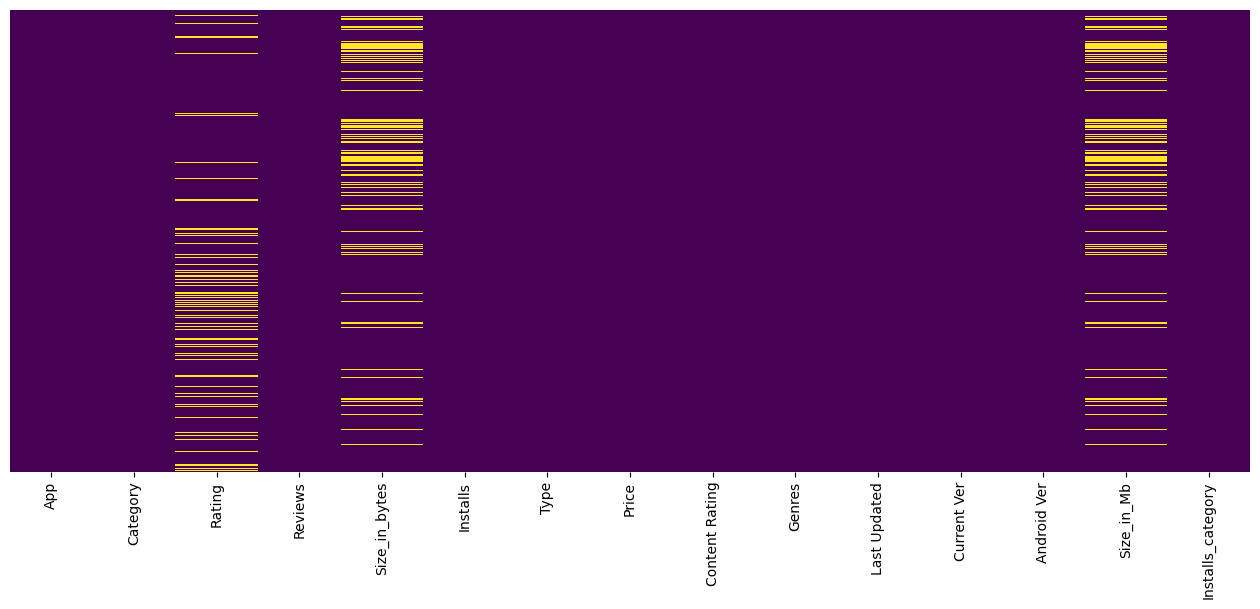

In [52]:
# make a figure size
plt.figure(figsize=(16, 6))
#plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # this will show the heatmap of null values in the dataframe

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

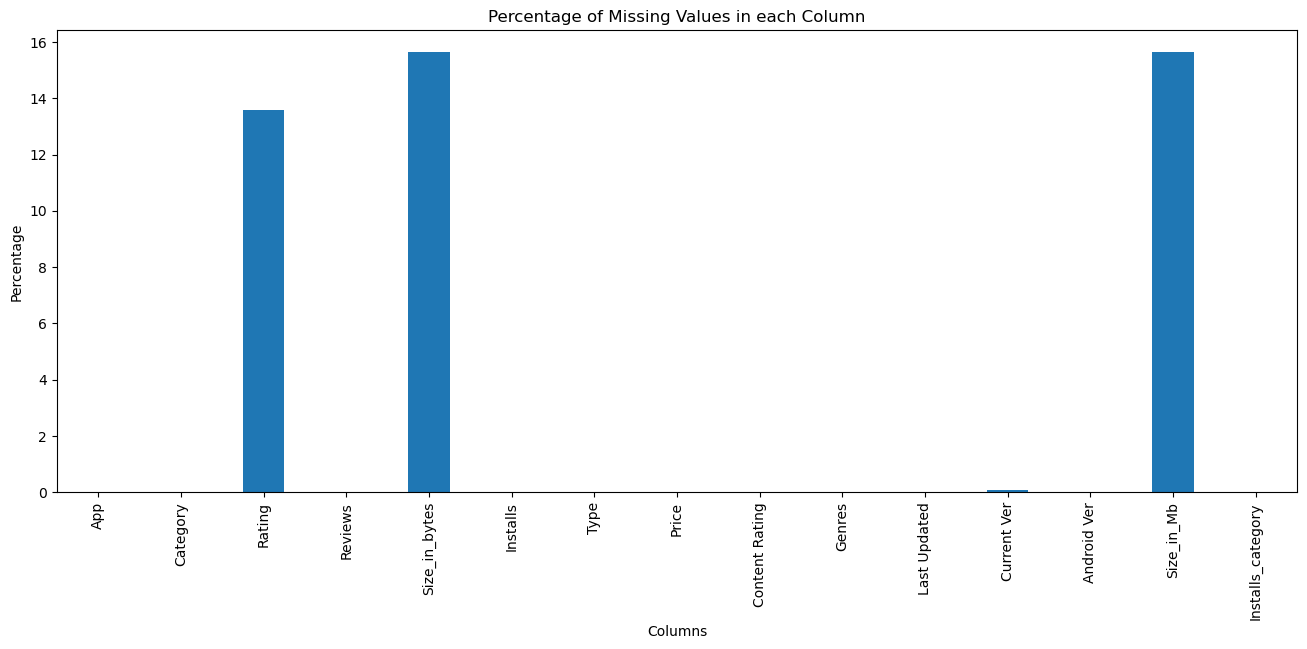

In [53]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

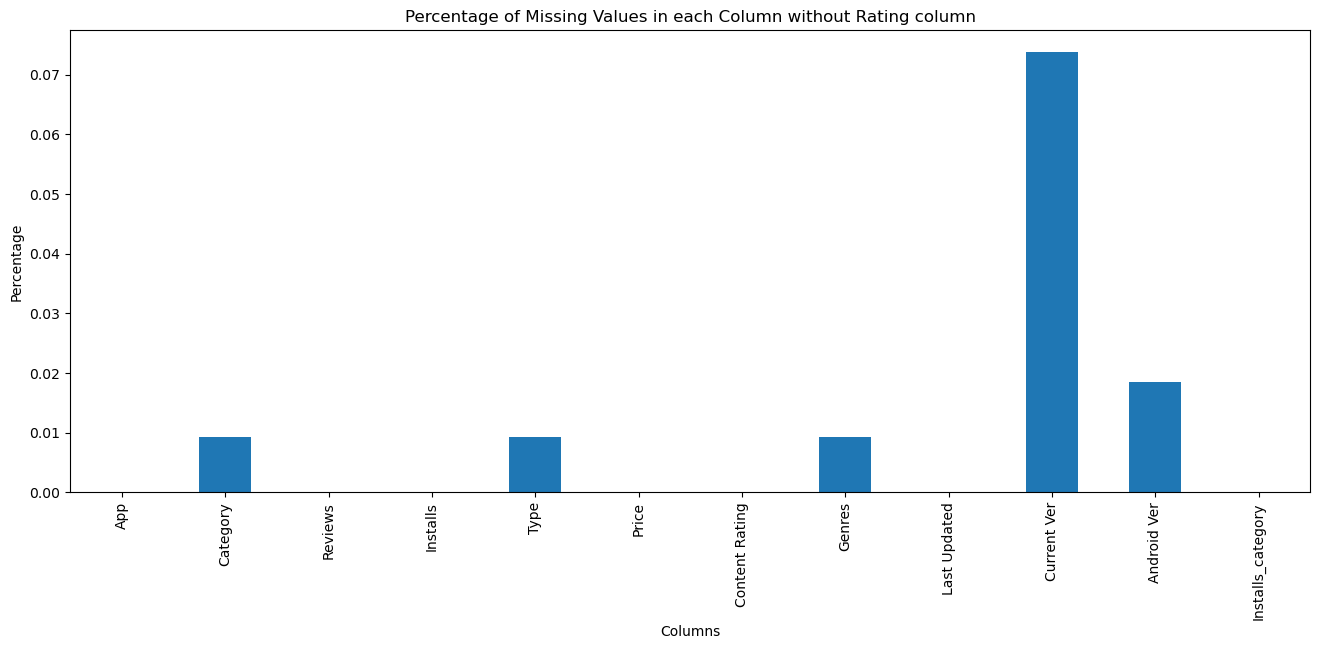

In [54]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [55]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [56]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as it is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [57]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

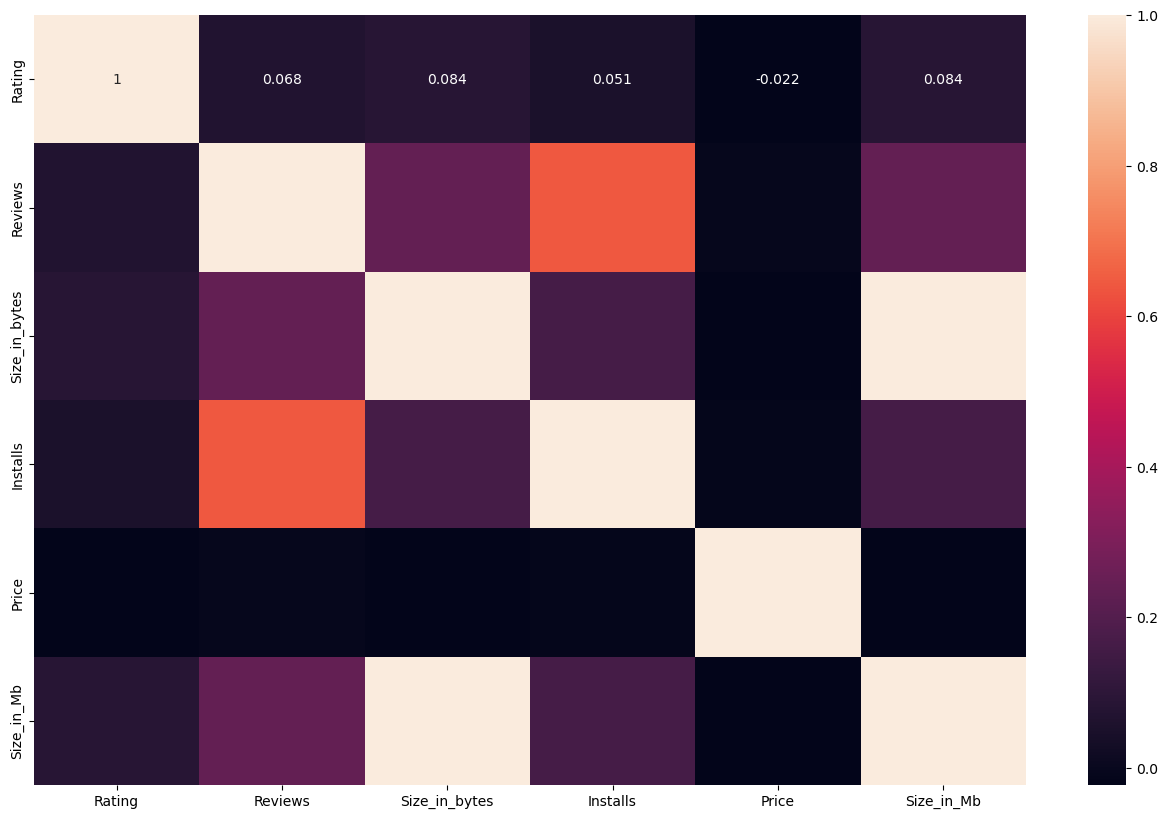

In [58]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [59]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


Pearson correlation coefficient:

In [60]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")  #.4f means upto 4 decimal places

Pearson's R between Reviews and Installs: 0.6262


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we impute the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [61]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [62]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [63]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [64]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [65]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [66]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Assignemt: Please replace the respective missing values of Rating, with respect to the average give in each 'Installs Category'!

In [67]:
# replace the respective missing values of Rating, with respect to the average give in each 'Installs Category'
df['Rating'] = df.groupby('Installs_category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [68]:
df['Rating'].isnull().sum()

14

In [69]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    14
Very low               0
Low                    0
Moderate               0
More than moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

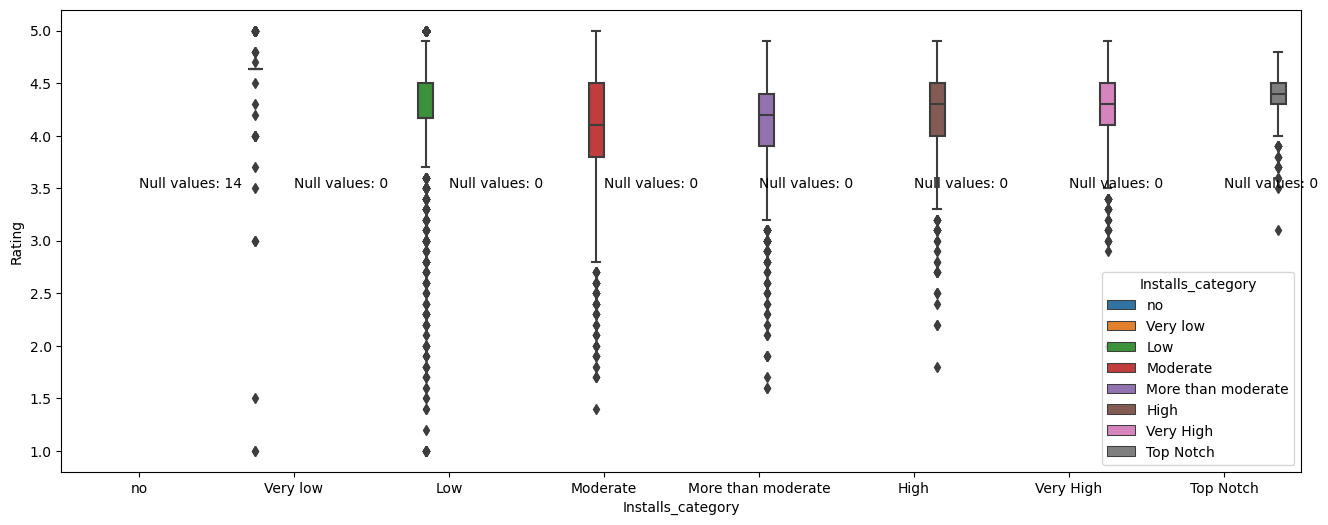

In [70]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 0')
plt.text(2, 3.5, 'Null values: 0')
plt.text(3, 3.5, 'Null values: 0')
plt.text(4, 3.5, 'Null values: 0')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well

In [71]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

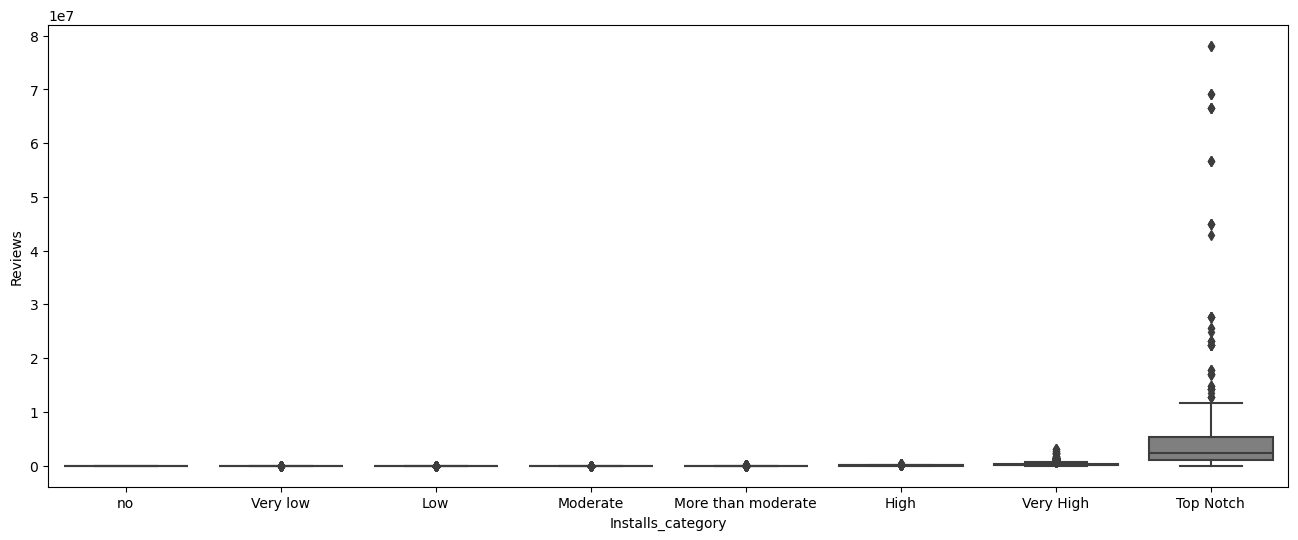

In [72]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

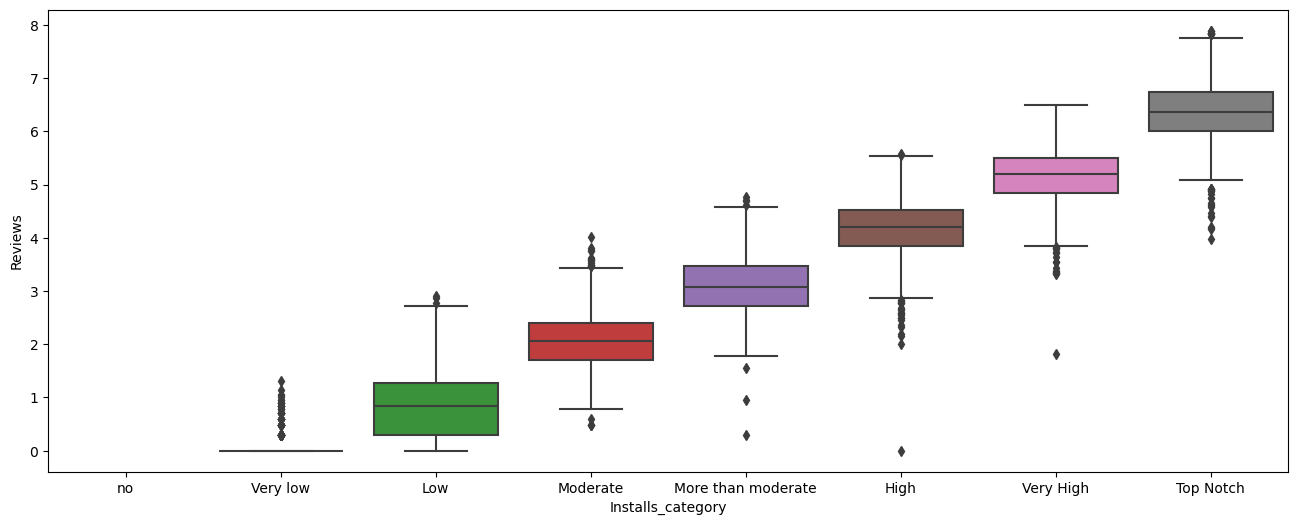

In [73]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

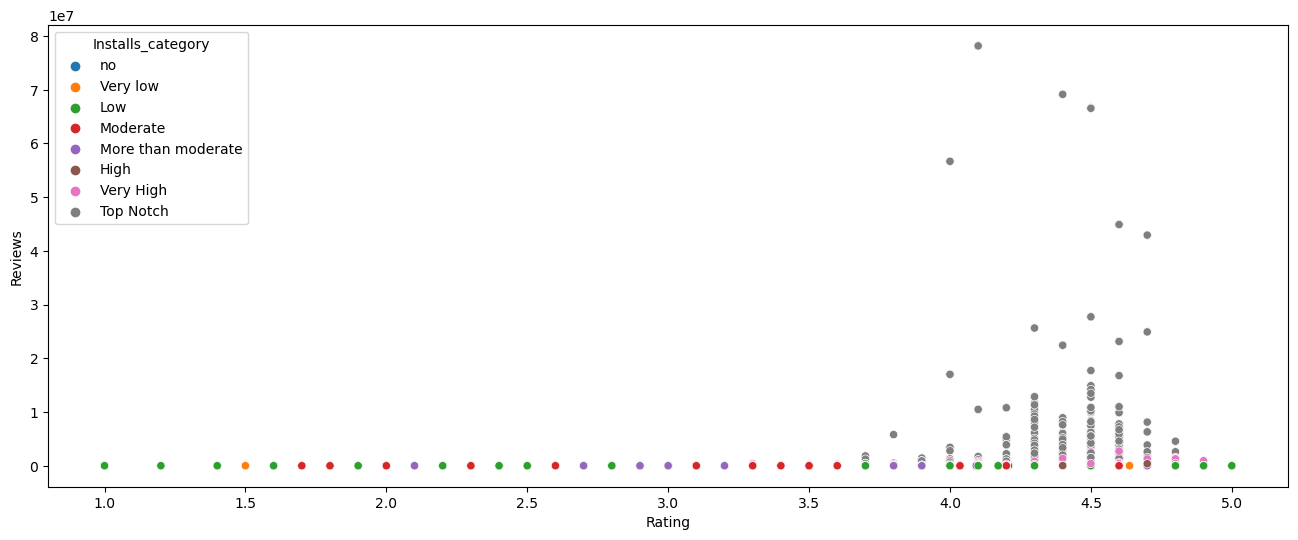

In [74]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

<Axes: xlabel='Rating', ylabel='Reviews'>

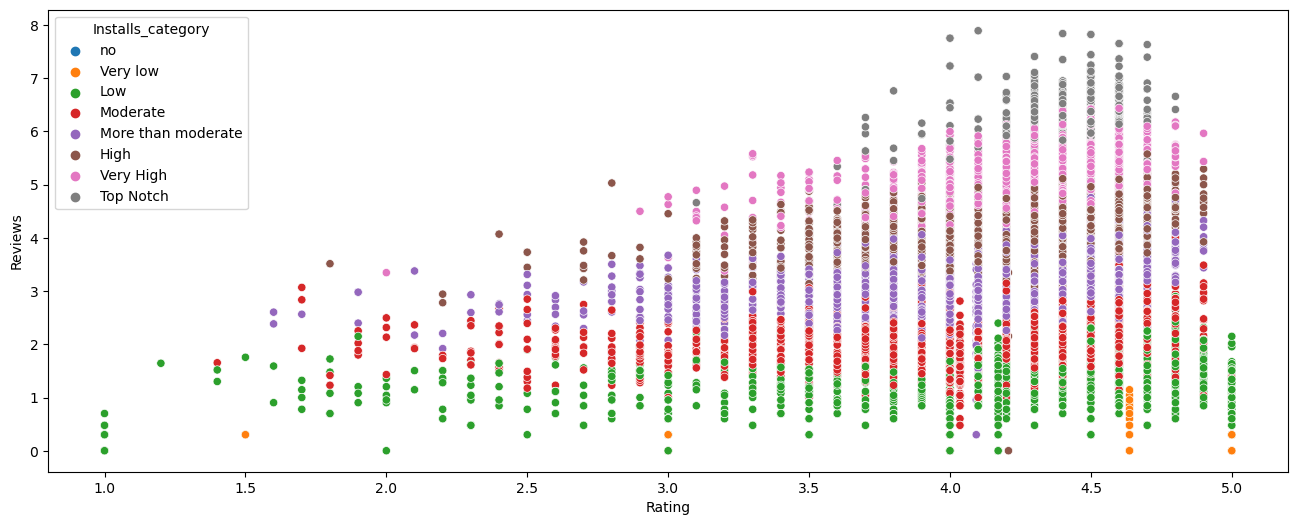

In [75]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y=np.log10(df['Reviews']), hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

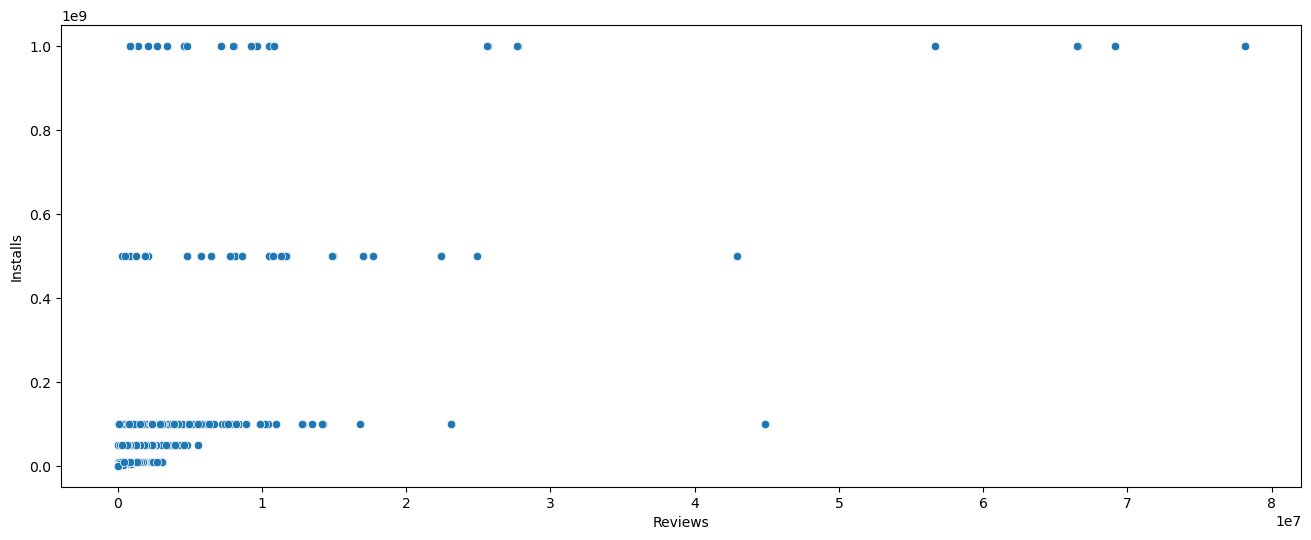

In [76]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

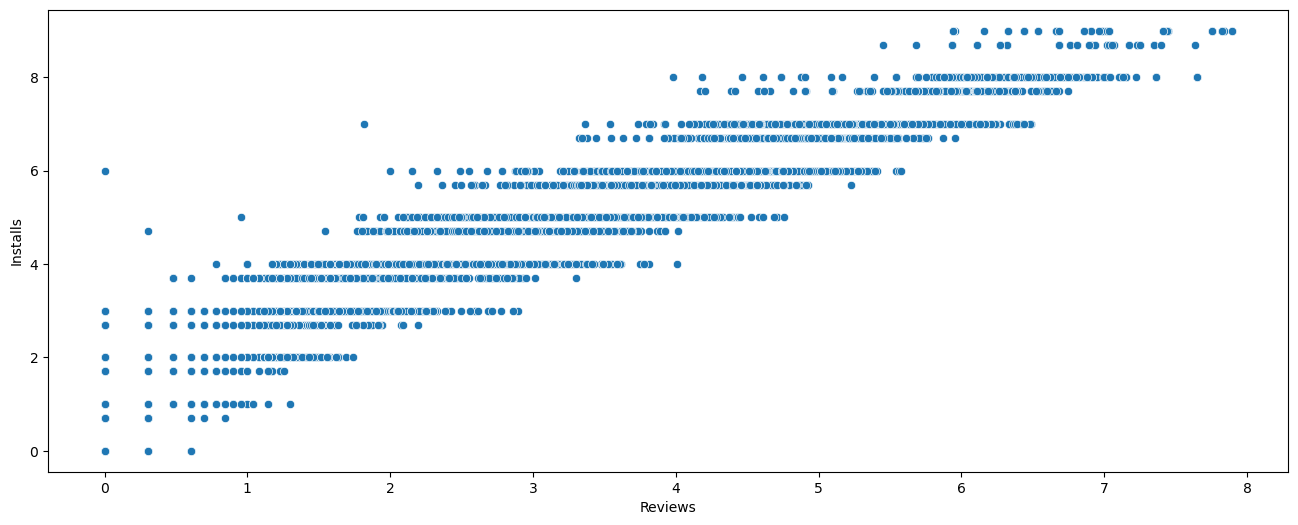

In [77]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

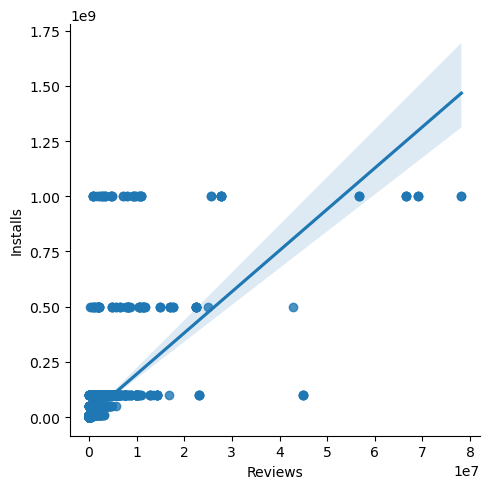

In [78]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis.

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [79]:
# find duplicate if any
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [80]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [81]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


This means that the only better way to find duplicates is to check for whole data

In [82]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [83]:
# find exact duplicates and print them
# df[df['App'].duplicated(keep=False)].sort_values(by='App')

- **Remove Duplicates**

In [84]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [85]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **3. Insights from Data**

### -> **3.1: Questions**:
1.  Which are the top 10 intalled apps? 
2.  Are they paid or free?
3.  What is the size of the top 10 installed apps?
4.  Does size and app type related to each other?
5.  Which are the Categories of top 10 apps?
6.  Which Category installed the most?
7.  Does the Category and app size are related?
8.  Which apps got the most reviews?
9.  Which category does they belong to?
10. What is the relation between Installs and reviews?
11. How many reviews does the top 10 apps have?
12. Which category has the maximum number of reviews?
13. what is the Relation between Reviews, installs and category of apps?
14. Is there any effect of app type on the number of Installs?
15. Is there any effect of app type on the number of Reviews?
    

 1. **Which are the top 10 intalled apps?**

In [89]:
 
df.groupby('App')['Installs'].value_counts().sort_values(ascending=False).head(10)

App                             Installs  
ROBLOX                          100000000     9
8 Ball Pool                     100000000     7
Zombie Catchers                 10000000      6
Helix Jump                      100000000     6
Temple Run 2                    500000000     5
Subway Surfers                  1000000000    5
Duolingo: Learn Languages Free  100000000     5
slither.io                      100000000     5
Bowmasters                      50000000      5
Angry Birds Classic             100000000     5
Name: count, dtype: int64

 2. **Are they paid or free?**

In [90]:

df.groupby('App')['Type'].value_counts().sort_values(ascending=False).head(10)

App                             Type
ROBLOX                          Free    9
8 Ball Pool                     Free    7
Bubble Shooter                  Free    6
Helix Jump                      Free    6
Zombie Catchers                 Free    6
Farm Heroes Saga                Free    5
Temple Run 2                    Free    5
Duolingo: Learn Languages Free  Free    5
Granny                          Free    5
Subway Surfers                  Free    5
Name: count, dtype: int64

3. **What is the size of the top 10 installed apps?**


In [95]:
df.groupby('App')['Size_in_Mb'].value_counts().sort_values(ascending=False).head(10)

App                  Size_in_Mb
ROBLOX               67.0          9
8 Ball Pool          52.0          7
Zombie Catchers      75.0          6
Helix Jump           33.0          6
Candy Crush Saga     74.0          5
Subway Surfers       76.0          5
Temple Run 2         62.0          5
Granny               59.0          5
Angry Birds Classic  97.0          5
My Talking Angela    99.0          4
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='Size_in_Mb'>

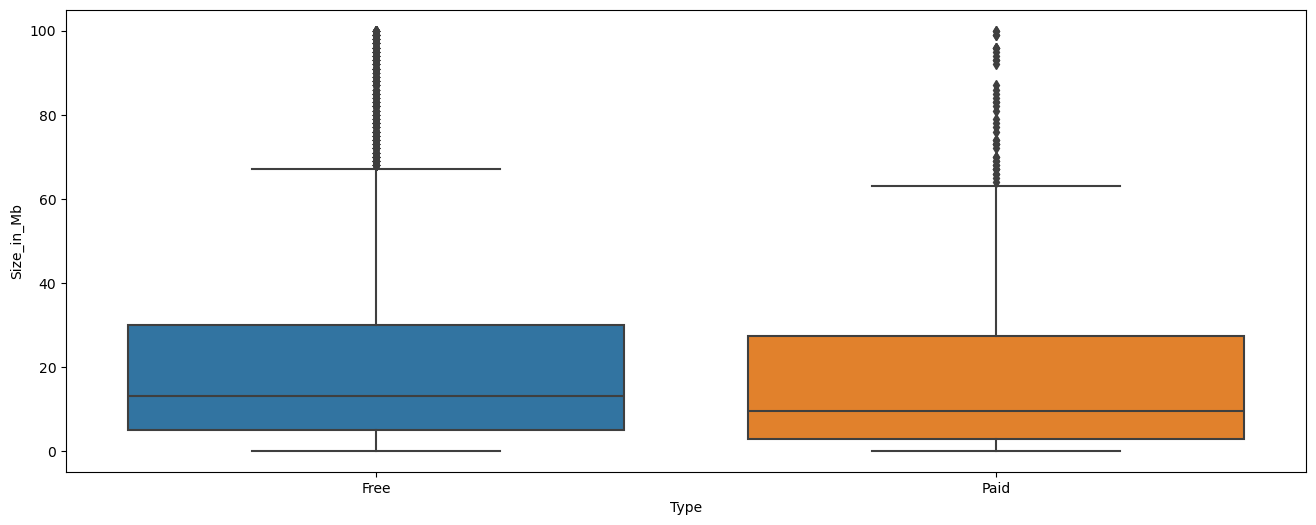

In [100]:
# 4.  plot to see if the 'Size_in_Mb' and 'Type' column are related to each other
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Type', y='Size_in_Mb', data=df) # plot the boxplot


In [137]:
# 5.  Which are the Categories of top 10 apps?
df[['App','Category']].sort_values(by='App',ascending=False).head(10)

,App,Category
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL
4362,💎 I'm rich,LIFESTYLE
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS
6420,감성학원 BL 첫사랑,COMICS
9222,英漢字典 EC Dictionary,FAMILY
313,"漫咖 Comics - Manga,Novel and Stories",COMICS
5698,日本AV历史,BOOKS_AND_REFERENCE
10109,哈哈姆特不EY,COMMUNICATION


In [106]:
# 6.  Which Category has the maximum number of installs?
category_max = df['Category'].value_counts().idxmax()
category_max

'FAMILY'

<Axes: xlabel='Category', ylabel='Size_in_bytes'>

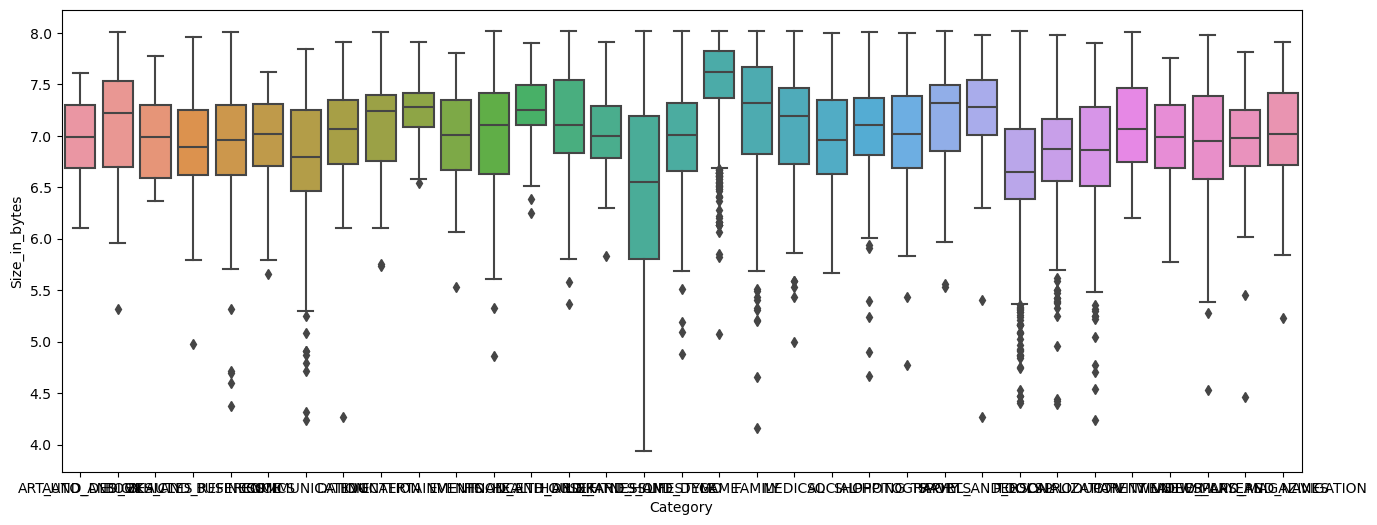

In [109]:
# 7. plot to see if the 'Category' and 'Size_in_bytes' are related
plt.figure(figsize=(16, 6)) # make figure size  
sns.boxplot(x='Category', y= np.log10(df['Size_in_bytes']), data=df) # plot the boxplot


In [124]:
# 8.  Which apps got the most reviews?
df[['App','Reviews']].sort_values(by='Reviews', ascending=False).head(5)

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446


In [136]:
# 9.  Which category does they belong to?
df[['App','Category', 'Reviews']].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Reviews
2544,Facebook,SOCIAL,78158306
3943,Facebook,SOCIAL,78128208
336,WhatsApp Messenger,COMMUNICATION,69119316
3904,WhatsApp Messenger,COMMUNICATION,69109672
2604,Instagram,SOCIAL,66577446


<Axes: xlabel='Reviews', ylabel='Installs'>

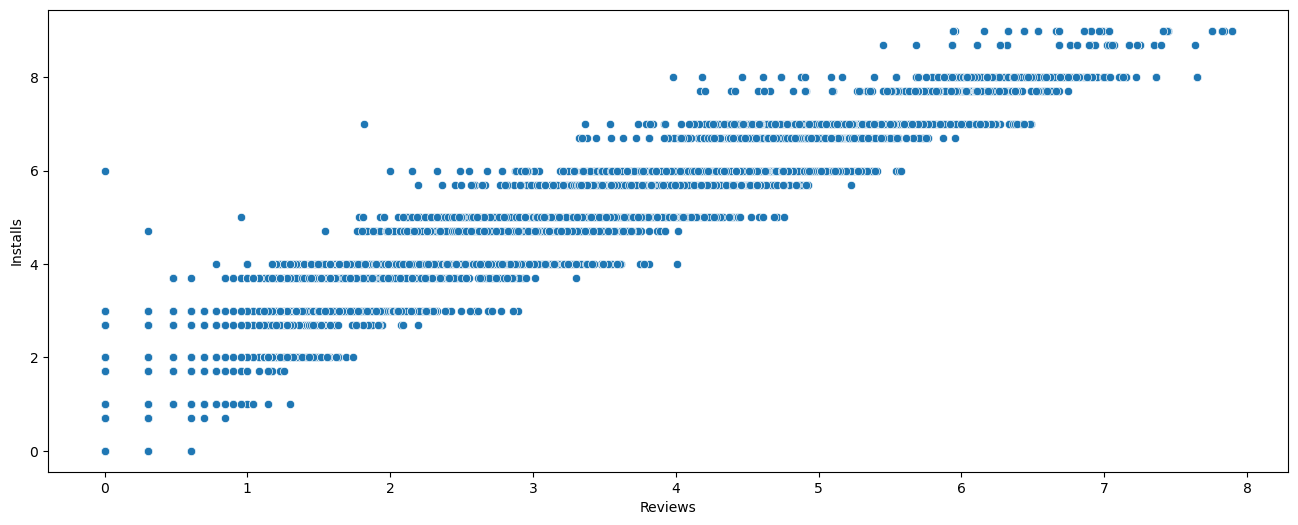

In [141]:
# 10. plot the relation between 'Installs' and 'reviews'
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot


In [142]:
# 11. How many reviews does the top 10 apps have?
df[['App','Reviews']].sort_values(by='Reviews', ascending=False).head(10)

,App,Reviews
2544,Facebook,78158306
3943,Facebook,78128208
336,WhatsApp Messenger,69119316
3904,WhatsApp Messenger,69109672
2604,Instagram,66577446
2545,Instagram,66577313
3909,Instagram,66509917
382,Messenger – Text and Video Chat for Free,56646578
335,Messenger – Text and Video Chat for Free,56642847
1879,Clash of Clans,44893888


In [145]:
# 12. Which category has the maximum number of reviews?
df[['Category', 'App','Reviews']].sort_values(by='Reviews', ascending= False).head(1)

,Category,App,Reviews
2544,SOCIAL,Facebook,78158306


<Axes: xlabel='Installs', ylabel='Reviews'>

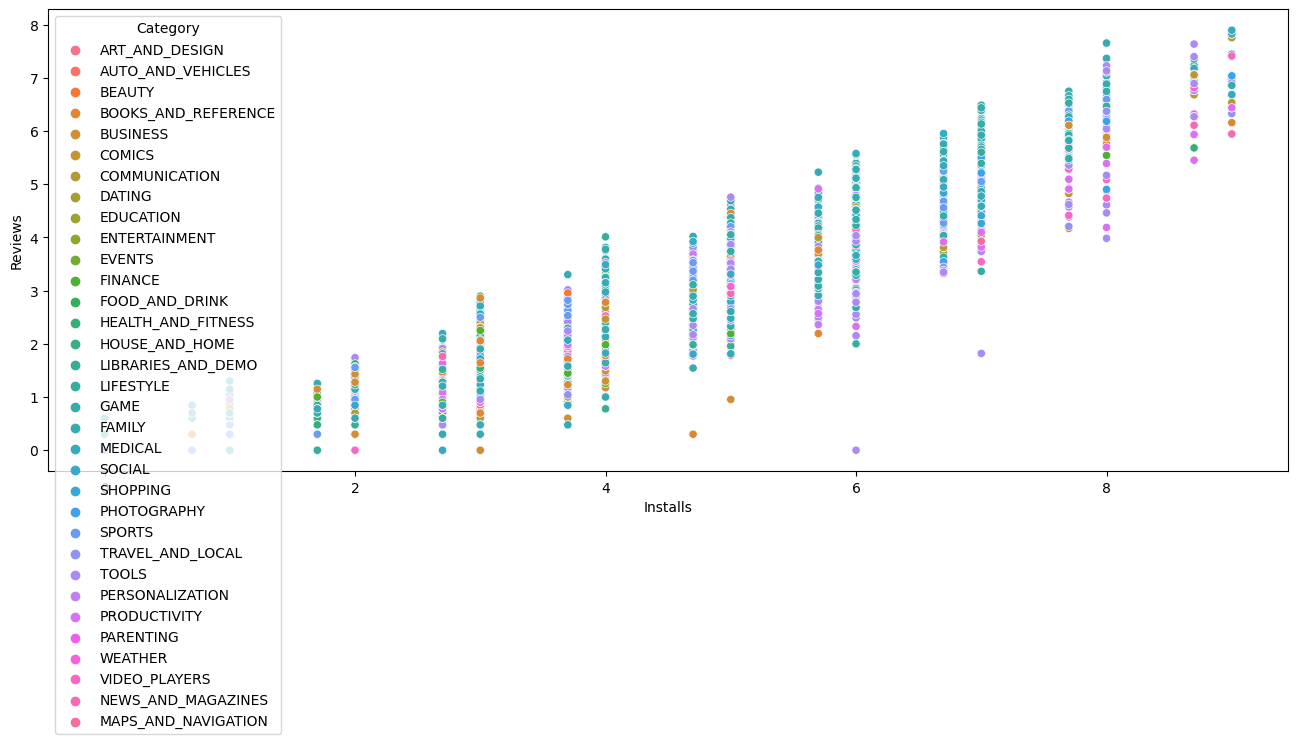

In [147]:
# 13. what is the Relation between Reviews, installs and category of apps?
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Installs']), y=np.log10(df['Reviews']), hue='Category', data=df) # plot the scatter plot


<Axes: xlabel='Type', ylabel='Installs'>

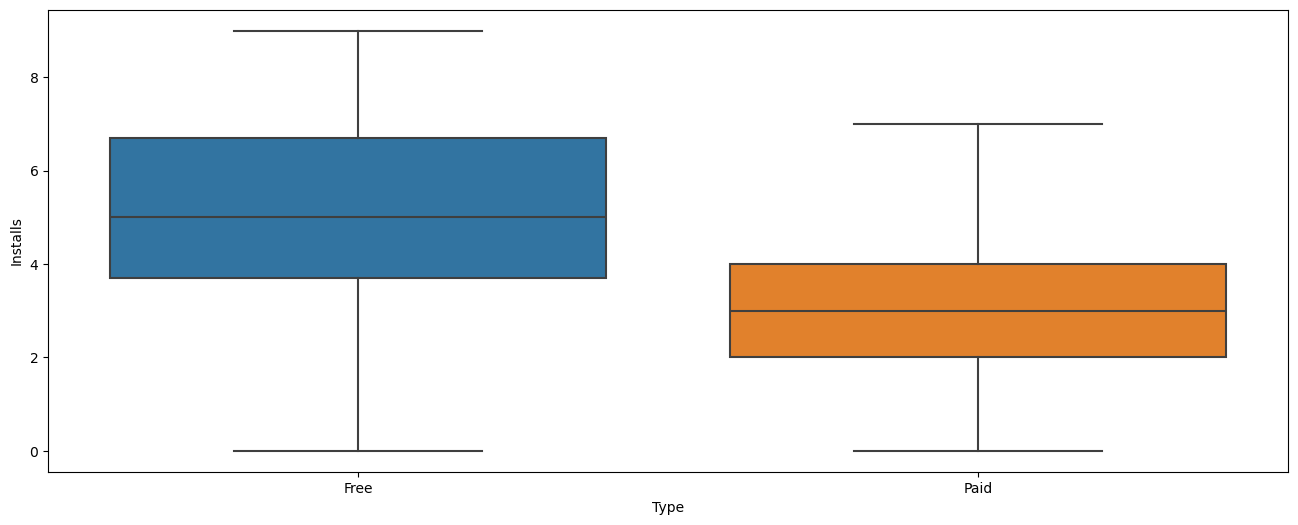

In [148]:
# 14. Is there any effect of app type on the number of Installs?
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Type', y=np.log10(df['Installs']), data=df) # plot the boxplot


<Axes: xlabel='Type', ylabel='Reviews'>

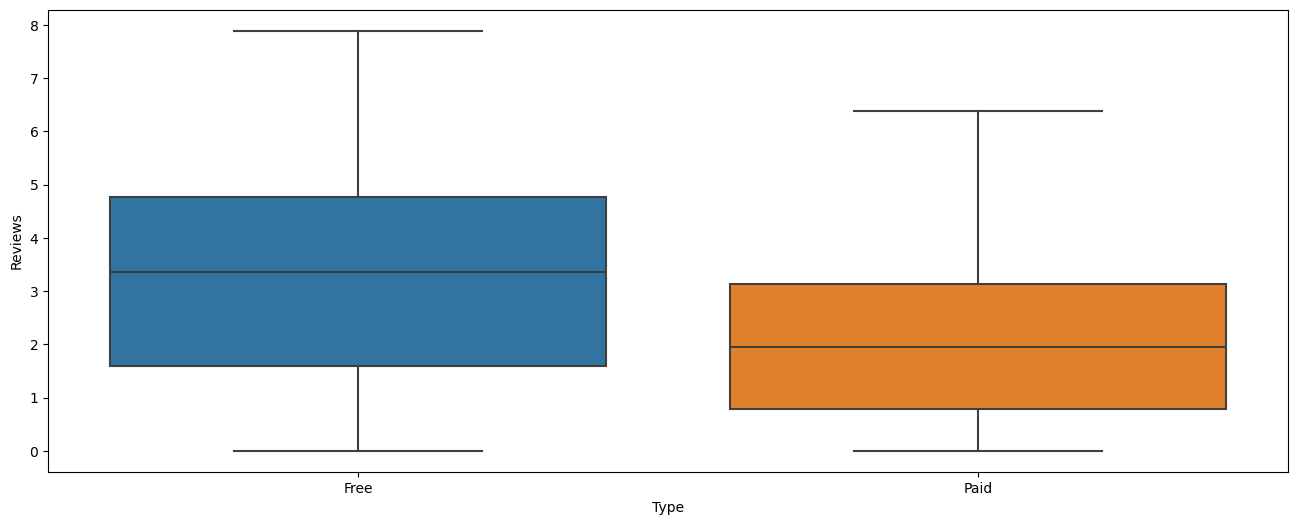

In [149]:
# 15. Is there any effect of app type on the number of Reviews?
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Type', y=np.log10(df['Reviews']), data=df) # plot the boxplot
